In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import requests
import psycopg2
#import config as creds

In [2]:

# Import our input dataset
#ames_df = pd.read_csv('Resources/ames_raw.csv', keep_default_na=False)
ames_df = pd.read_csv('Resources/ames_raw.csv')
ames_df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
ames_df = ames_df.drop(ames_df.columns[0], axis=1)

In [4]:
ames_df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [5]:
ames_df.columns = ['ames_order','pid','mssubclass','mszoning','lotfrontage','lotarea','street','alley','lotshape','landcontour', \
                   'utilities','lotconfig','landslope','neighborhood','condition1','condition2','bldgtype','housestyle',\
                   'overallqual','overallcond','yearbuilt','yearremodadd','roofstyle','roofmatl','exterior1st','exterior2nd',\
                   'masvnrtype','masvnrarea','exterqual','extercond','foundation','bsmtqual','bsmtcond','bsmtexposure',\
                   'bsmtfintype1','bsmtfinsf1','bsmtfintype2','bsmtfinsf2','bsmtunfsf','totalbsmtsf','heating','heatingqc',\
                   'centralair','electrical','1stflrsf','2ndflrsf','lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath',\
                   'fullbath','halfbath','bedroomabvgr','kitchenabvgr','kitchenqual','totrmsabvgrd','functional','fireplaces',\
                   'fireplacequ','garagetype','garageyrblt','garagefinish','garagecars','garagearea','garagequal','garagecond',\
                   'paveddrive','wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','poolarea','poolqc','fence',\
                   'miscfeature','miscval','mosold','yrsold','saletype','salecondition','saleprice']
ames_df.head(5)

,ames_order,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


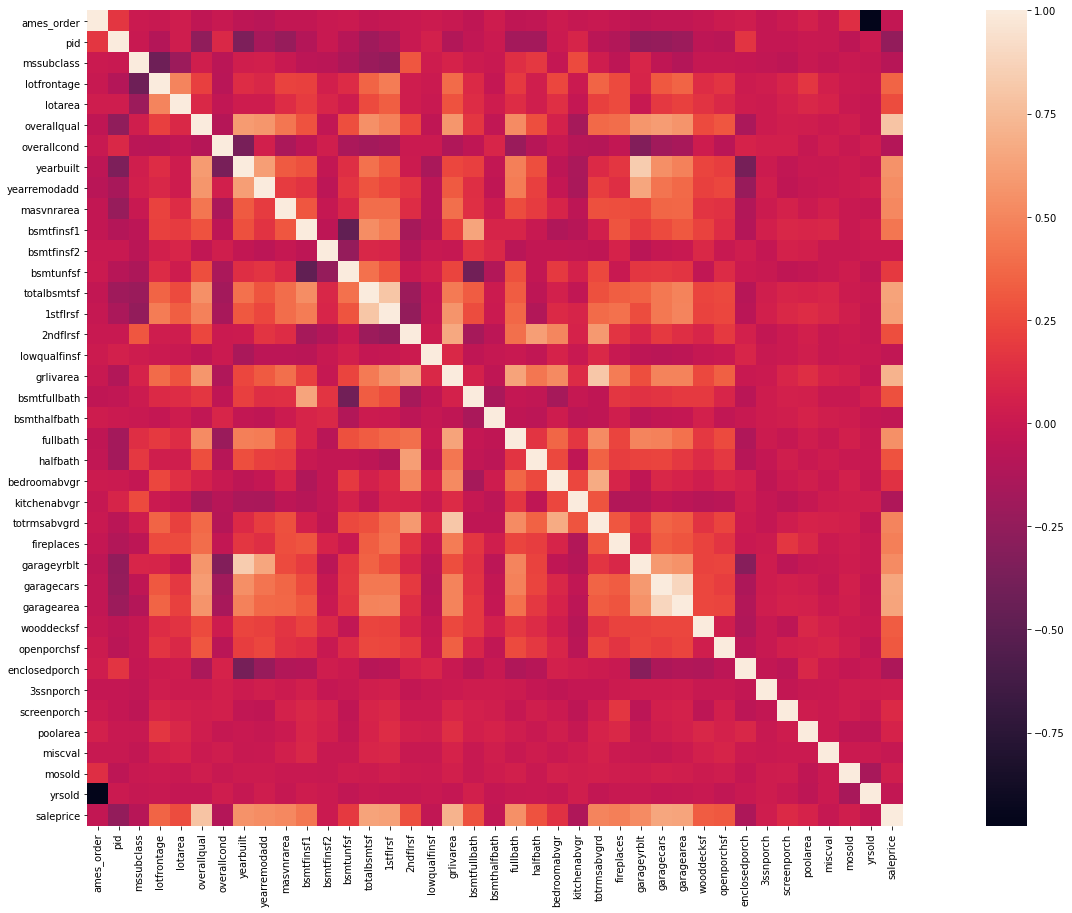

In [6]:
corrmat = ames_df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, vmax=1, square=True)

In [7]:
df_corr = ames_df.corr()

In [8]:
df_corr = df_corr.rename_axis(None).rename_axis(None, axis=1)
df_corr

,ames_order,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
ames_order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
pid,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
mssubclass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
lotfrontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
lotarea,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
overallqual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
overallcond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
yearbuilt,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
yearremodadd,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
masvnrarea,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [9]:
df_corr1 = df_corr.stack().reset_index()
#set column names
df_corr1.columns = ['Feature_A','Feature_B','Correlation']
print (df_corr1)

       Feature_A    Feature_B  Correlation
0     ames_order   ames_order     1.000000
1     ames_order          pid     0.173593
2     ames_order   mssubclass     0.011797
3     ames_order  lotfrontage    -0.007034
4     ames_order      lotarea     0.031354
...          ...          ...          ...
1516   saleprice     poolarea     0.068403
1517   saleprice      miscval    -0.015691
1518   saleprice       mosold     0.035259
1519   saleprice       yrsold    -0.030569
1520   saleprice    saleprice     1.000000

[1521 rows x 3 columns]


In [10]:
df_corr1.to_csv(r'Resources\Pearson_Corr_Data.csv')